# Pymaceuticals Inc.
---

### Analysis

- Mouse weight and tumor volume are highly correlated. 
- The distribution of female and male mice in this study are almost equal.
- Mice treated with either Capomulin or Ramicane regimen have smaller final tumor volume, compared to those treated with either Infubinol or Ceftamin regimen.
- For the Capomulin regimen treated group, mouse weight and the average tumor volume are positively correlated.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combinded_data = pd.merge(study_results, mouse_metadata, on= "Mouse ID")

# Display the data table for preview
combinded_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = combinded_data["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate = combinded_data[combinded_data.duplicated(['Mouse ID', 'Timepoint'])]["Mouse ID"].unique()
duplicate
 

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_id = combinded_data[combinded_data["Mouse ID"] == "g989"]
duplicate_mouse_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combinded_data[combinded_data["Mouse ID"] != "g989"]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_data["Mouse ID"].nunique()
clean_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
statistics = clean_data.groupby("Drug Regimen")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor_volume = statistics["Tumor Volume (mm3)"].mean()
median_tumor_volume = statistics["Tumor Volume (mm3)"].median()
tumor_volume_variance = statistics["Tumor Volume (mm3)"].var()
tumor_volume_std_dev = statistics["Tumor Volume (mm3)"].std()
tumor_volume_std_err = statistics["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.

Summary_data = pd.DataFrame({'Mean Tumor Volume': mean_tumor_volume, 
                           'Median Tumor Volume': median_tumor_volume,
                           'Tumor Volume Variance': tumor_volume_variance,
                           'Tumor Volume Std. Dev.' : tumor_volume_std_dev,
                           'Tumor Volume Std. Err' : tumor_volume_std_err})
Summary_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_data.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_stats


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

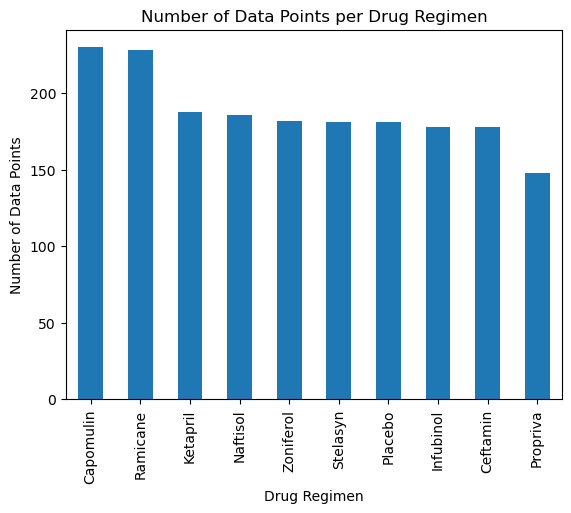

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = clean_data['Drug Regimen'].value_counts()
drug_counts.plot(kind='bar', title='Number of Data Points per Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()


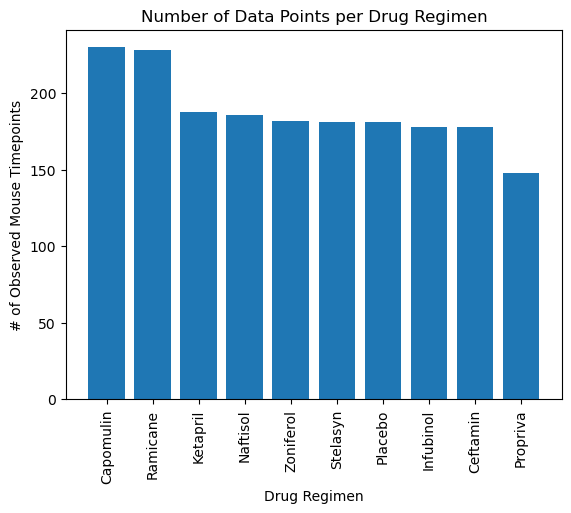

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_counts.index, drug_counts.values)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Data Points per Drug Regimen")
plt.xticks(rotation=90)
plt.show()

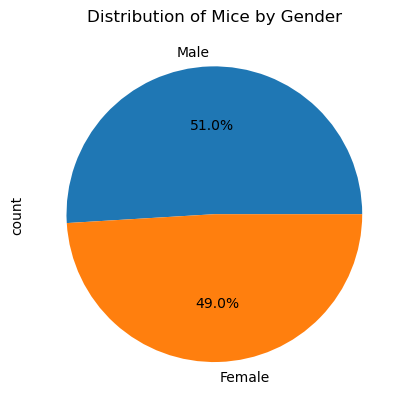

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_distribution = clean_data['Sex'].value_counts()

# Make the pie chart
gender_distribution.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Mice by Gender')
plt.show()  

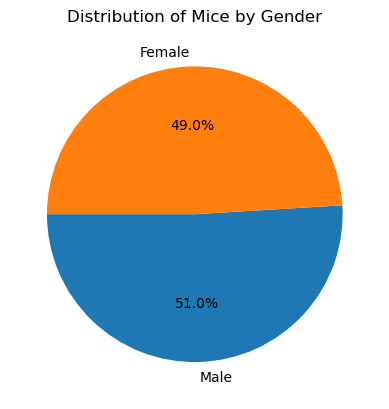

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=180)

# Make the pie chart
plt.title('Distribution of Mice by Gender')
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
#Create Dataframes for each of the 4 drugs listed.
Ramicane_df = clean_data.loc[clean_data['Drug Regimen'] == "Ramicane"]
Infubinol_df = clean_data.loc[clean_data['Drug Regimen'] == "Infubinol"]
Ceftamin_df = clean_data.loc[clean_data['Drug Regimen'] == "Ceftamin"]
Capomulin_df = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]

#combine dataframes
frames = [Capomulin_df, Ramicane_df, Infubinol_df, Ceftamin_df]
four_drugs = pd.concat(frames)

# Start by getting the last (greatest) timepoint for each mouse
group_by_ID = combinded_data.groupby(["Mouse ID"])
max_time =group_by_ID ["Timepoint"].max()

# Merge this group df with the original dataframe 
merged_frames = pd.merge(four_drugs,max_time, on="Mouse ID")
merged_frames["MaxTime"] = merged_frames["Timepoint_x"] == merged_frames["Timepoint_y"]

#drop all rows that do not include the max time
merged_frames.drop(merged_frames.loc[merged_frames['MaxTime']==False].index, inplace=True)

#create new df with Mouse ID, Drug Regimen, Time and Tumor Volume
time_tumor_df = merged_frames[["Mouse ID","Drug Regimen","Timepoint_x","Tumor Volume (mm3)"]]
time_tumor_df 

,Mouse ID,Drug Regimen,Timepoint_x,Tumor Volume (mm3)
67,w150,Capomulin,10,39.952347
84,r157,Capomulin,15,46.539206
100,f966,Capomulin,20,30.485985
169,j246,Capomulin,35,38.753265
209,b128,Capomulin,45,38.982878
...,...,...,...,...
809,k210,Ceftamin,45,68.923185
810,x822,Ceftamin,45,61.386660
811,l733,Ceftamin,45,64.299830
812,o287,Ceftamin,45,59.741901


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment:
    volume = time_tumor_df.loc[time_tumor_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_volume.append(volume)
    #print(tumor_volume)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartile = volume.quantile([0.25,0.5,0.75])
    lower = quartile[0.25]
    upper = quartile[0.75]
    iqr = upper - lower
    #print(iqr)
   
    
    # Determine outliers using upper and lower bounds
    low_bound = lower - (1.5*iqr)
    up_bound = upper + (1.5*iqr)
    outliers = volume.loc[(volume > up_bound) | (volume < low_bound)]
    if len(outliers) > 0:
        print(f"The outliers for {drug} are {outliers}.")


The outliers for Infubinol are 492    36.321346
Name: Tumor Volume (mm3), dtype: float64.


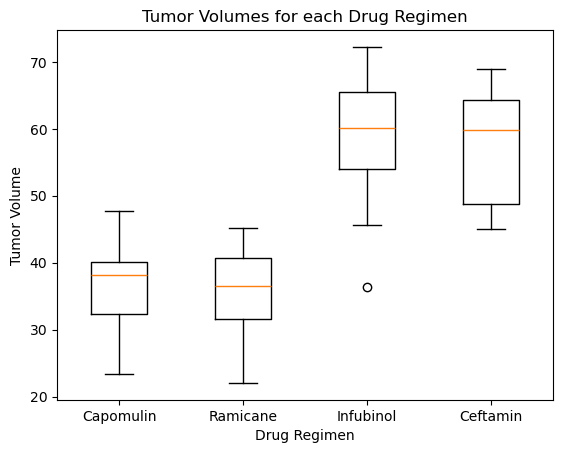

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume, labels = treatment)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volumes for each Drug Regimen")
plt.show()

## Line and Scatter Plots

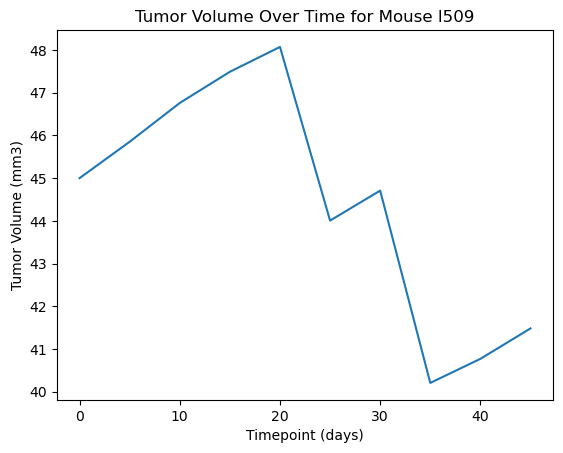

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
mouse_data = clean_data[(clean_data['Mouse ID'] == mouse_id) & (clean_data['Drug Regimen'] == 'Capomulin')]

# Line plot of tumor volume versus time point
plt.figure()
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], linestyle='-')
plt.title(f'Tumor Volume Over Time for Mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

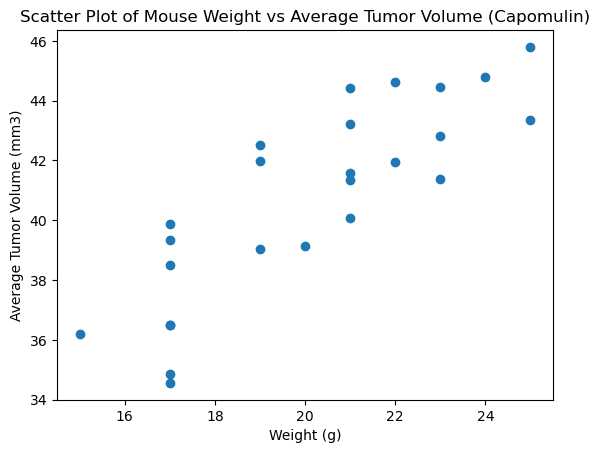

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Scatter plot
plt.figure()
plt.scatter(mouse_weight, avg_tumor_vol)
plt.title('Scatter Plot of Mouse Weight vs Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

Correlation coefficient: 0.8419363424694722


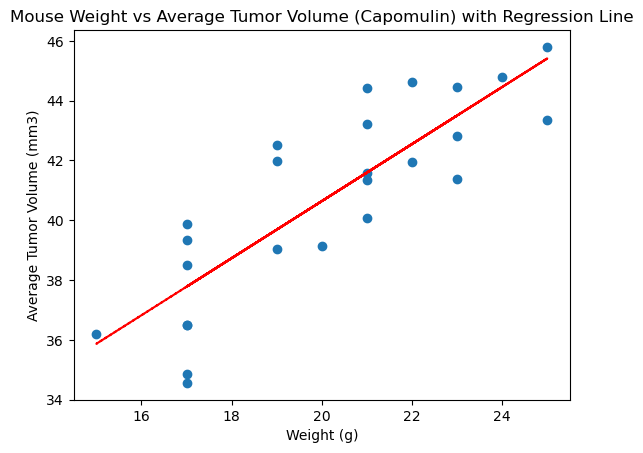

In [19]:
# Calculate the correlation coefficient and a linear regression model

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

# Calculate correlation
correlation = np.corrcoef(mouse_weight, avg_tumor_vol)[0, 1]
print(f'Correlation coefficient: {correlation}')

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, avg_tumor_vol)
plt.figure()
plt.scatter(mouse_weight, avg_tumor_vol)
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red', linestyle='--')
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin) with Regression Line')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()